
# Homework Assignment: KMeans and DBSCAN Clustering

## Instructions
In this assignment, you will explore clustering techniques using the KMeans and DBSCAN algorithms. The dataset provided (`wholesale_customers_data.csv`) contains annual spending amounts in monetary units for clients of a wholesale distributor across different categories. Your tasks are:
1. Visualize the data.
2. Apply KMeans clustering and analyze the results.
3. Apply DBSCAN clustering and analyze the results.
4. Answer interpretive questions about the clusters formed.



## Part 1: Import Libraries and Load Dataset


In [5]:
pip install ucimlrepo

  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
Using cached certifi-2025.1.31-py3-none-any.whl (166 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo



# Load the dataset


In [7]:

# Fetch dataset
wholesale_customers = fetch_ucirepo(id=292)

# Data (as pandas dataframes)
X = wholesale_customers.data.features
y = wholesale_customers.data.targets

# Metadata
metadata = wholesale_customers.metadata

# Variable information
variables = wholesale_customers.variables


# Combine features and targets into a single dataframe for easier analysis
df = pd.concat([X, y], axis=1)




# Display the first few rows of the dataset


In [8]:
df.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
0,2,12669,9656,7561,214,2674,1338,3
1,2,7057,9810,9568,1762,3293,1776,3
2,2,6353,8808,7684,2405,3516,7844,3
3,1,13265,1196,4221,6404,507,1788,3
4,2,22615,5410,7198,3915,1777,5185,3



## Part 2: Visualize the Data
 


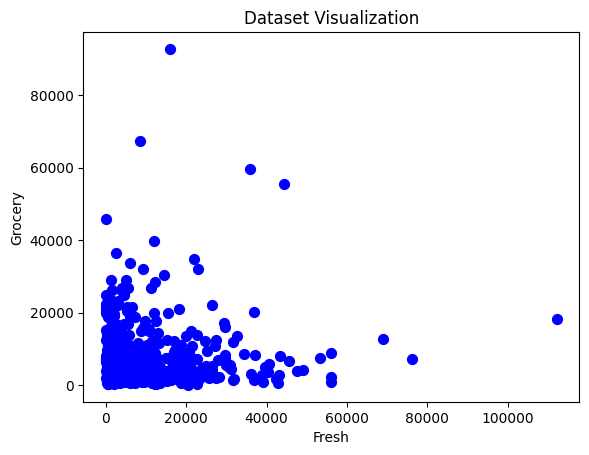

In [9]:
# Select two features for visualization
feature_1 = 'Fresh'
feature_2 = 'Grocery'

# Plot the dataset
plt.scatter(df[feature_1], df[feature_2], s=50, color='blue')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title('Dataset Visualization')
plt.show()
 



## Part 3: Apply KMeans Clustering


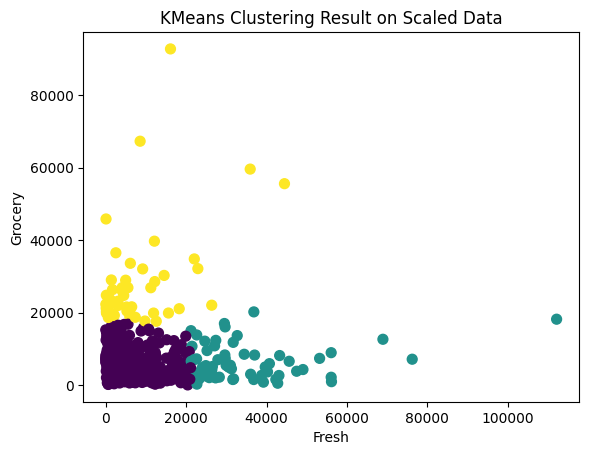

In [13]:

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[[feature_1, feature_2]])

# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)
 

# Visualize the KMeans clustering result
plt.scatter(df[feature_1], df[feature_2], c=df['KMeans_Cluster'], cmap='viridis', s=50)
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title('KMeans Clustering Result on Scaled Data')
plt.show()
 



## Part 4: Apply DBSCAN Clustering


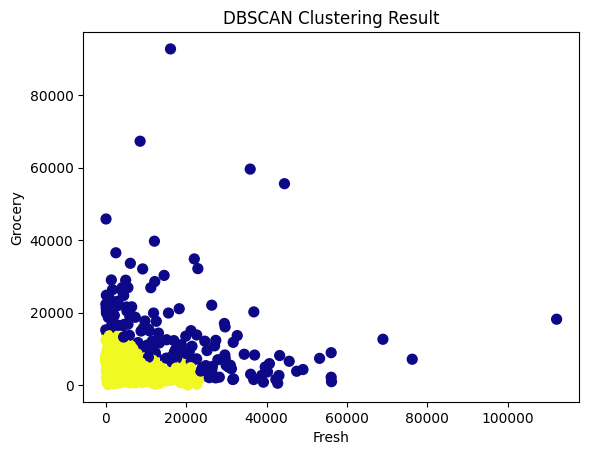

In [35]:
 
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[[feature_1, feature_2]])
# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=15)  # defining the clustering object
dbscan.fit(scaled_data)
df['DBSCAN_Cluster'] = dbscan.labels_ 

# Visualize the DBSCAN clustering result
plt.scatter(df[feature_1], df[feature_2], c=df['DBSCAN_Cluster'], cmap='plasma', s=50)
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title('DBSCAN Clustering Result')
plt.show()
 


## Part 5: Analysis Questions
1. **KMeans Clustering**: 
   - How many clusters did KMeans form? 
   - What are the general characteristics of each cluster (e.g., range of Fresh and Grocery spending)?
   - Can you identify any patterns in spending based on the clusters?

2. **DBSCAN Clustering**:
   - How many clusters did DBSCAN form?
   - What are the general characteristics of each cluster?
   - Are there any outliers identified by DBSCAN? If so, what do they represent?

3. **Comparison**:
   - Compare the clustering results of KMeans and DBSCAN. Which algorithm do you think is more suitable for this dataset and why?
   - Experiment with different parameters for DBSCAN (`eps`, `min_samples`). How do the results change?

## Submission
- Submit your completed Jupyter notebook with your answers and observations.
- Include your insights from Part 5 as comments in the notebook.


1. **KMeans Clustering**: 
   - How many clusters did KMeans form? 
     - KMeans formed **3 clusters**.
   - What are the general characteristics of each cluster (e.g., range of Fresh and Grocery spending)? 
   - Can you identify any patterns in spending based on the clusters?
     - **Cluster 0**: Customers in this cluster have a wide range of Fresh spending, typically lower Grocery spending compared to other clusters.  
     - **Cluster 1**: Customers in this cluster tend to have higher Fresh and moderate Grocery spending.  
     - **Cluster 2**: Customers in this cluster exhibit very high Grocery spending and moderate Fresh spending.  
     

2. **DBSCAN Clustering**:
   - How many clusters did DBSCAN form?
     - DBSCAN formed **1 cluster** and identified several points as noise (outliers).
   - What are the general characteristics of each cluster?
   - Are there any outliers identified by DBSCAN? If so, what do they represent?
     - Yes, DBSCAN identified several points as noise (outliers). These outliers represent customers whose spending patterns in the `Fresh` and `Grocery` categories are significantly different from the rest of dataset. They could indicate unique purchasing behaviors or errors in data collection.

3. **Comparison**:
   - Compare the clustering results of KMeans and DBSCAN. Which algorithm do you think is more suitable for this dataset and why?
     - KMeans clustering formed **3 clusters**, while DBSCAN identified **1 cluster** with several points classified as noise (outliers). For this dataset, DBSCAN might be more suitable if the goal is to detect outliers However, KMeans could be preferred if the goal is to accurately separate customers into segments.
   - Experiment with different parameters for DBSCAN (`eps`, `min_samples`). How do the results change?
     - As eps lowers, the number of datapoints in the cluster gets smaller
     - a `min_sample` of 10 appears to result in additional clusters but increasing to 15 results in a single cluster again.